In [ ]:
# Parkinson's Disease Prediction - EDA and Modeling

In [1]:
## שלב 1: טעינת ספריות
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
## שלב 2: טעינת הדאטה
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
df = pd.read_csv(url)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
## שלב 3: בדיקות ראשוניות
print(df.shape)
print(df.isnull().sum())
print(df.describe())

(195, 24)
name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64
       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000       

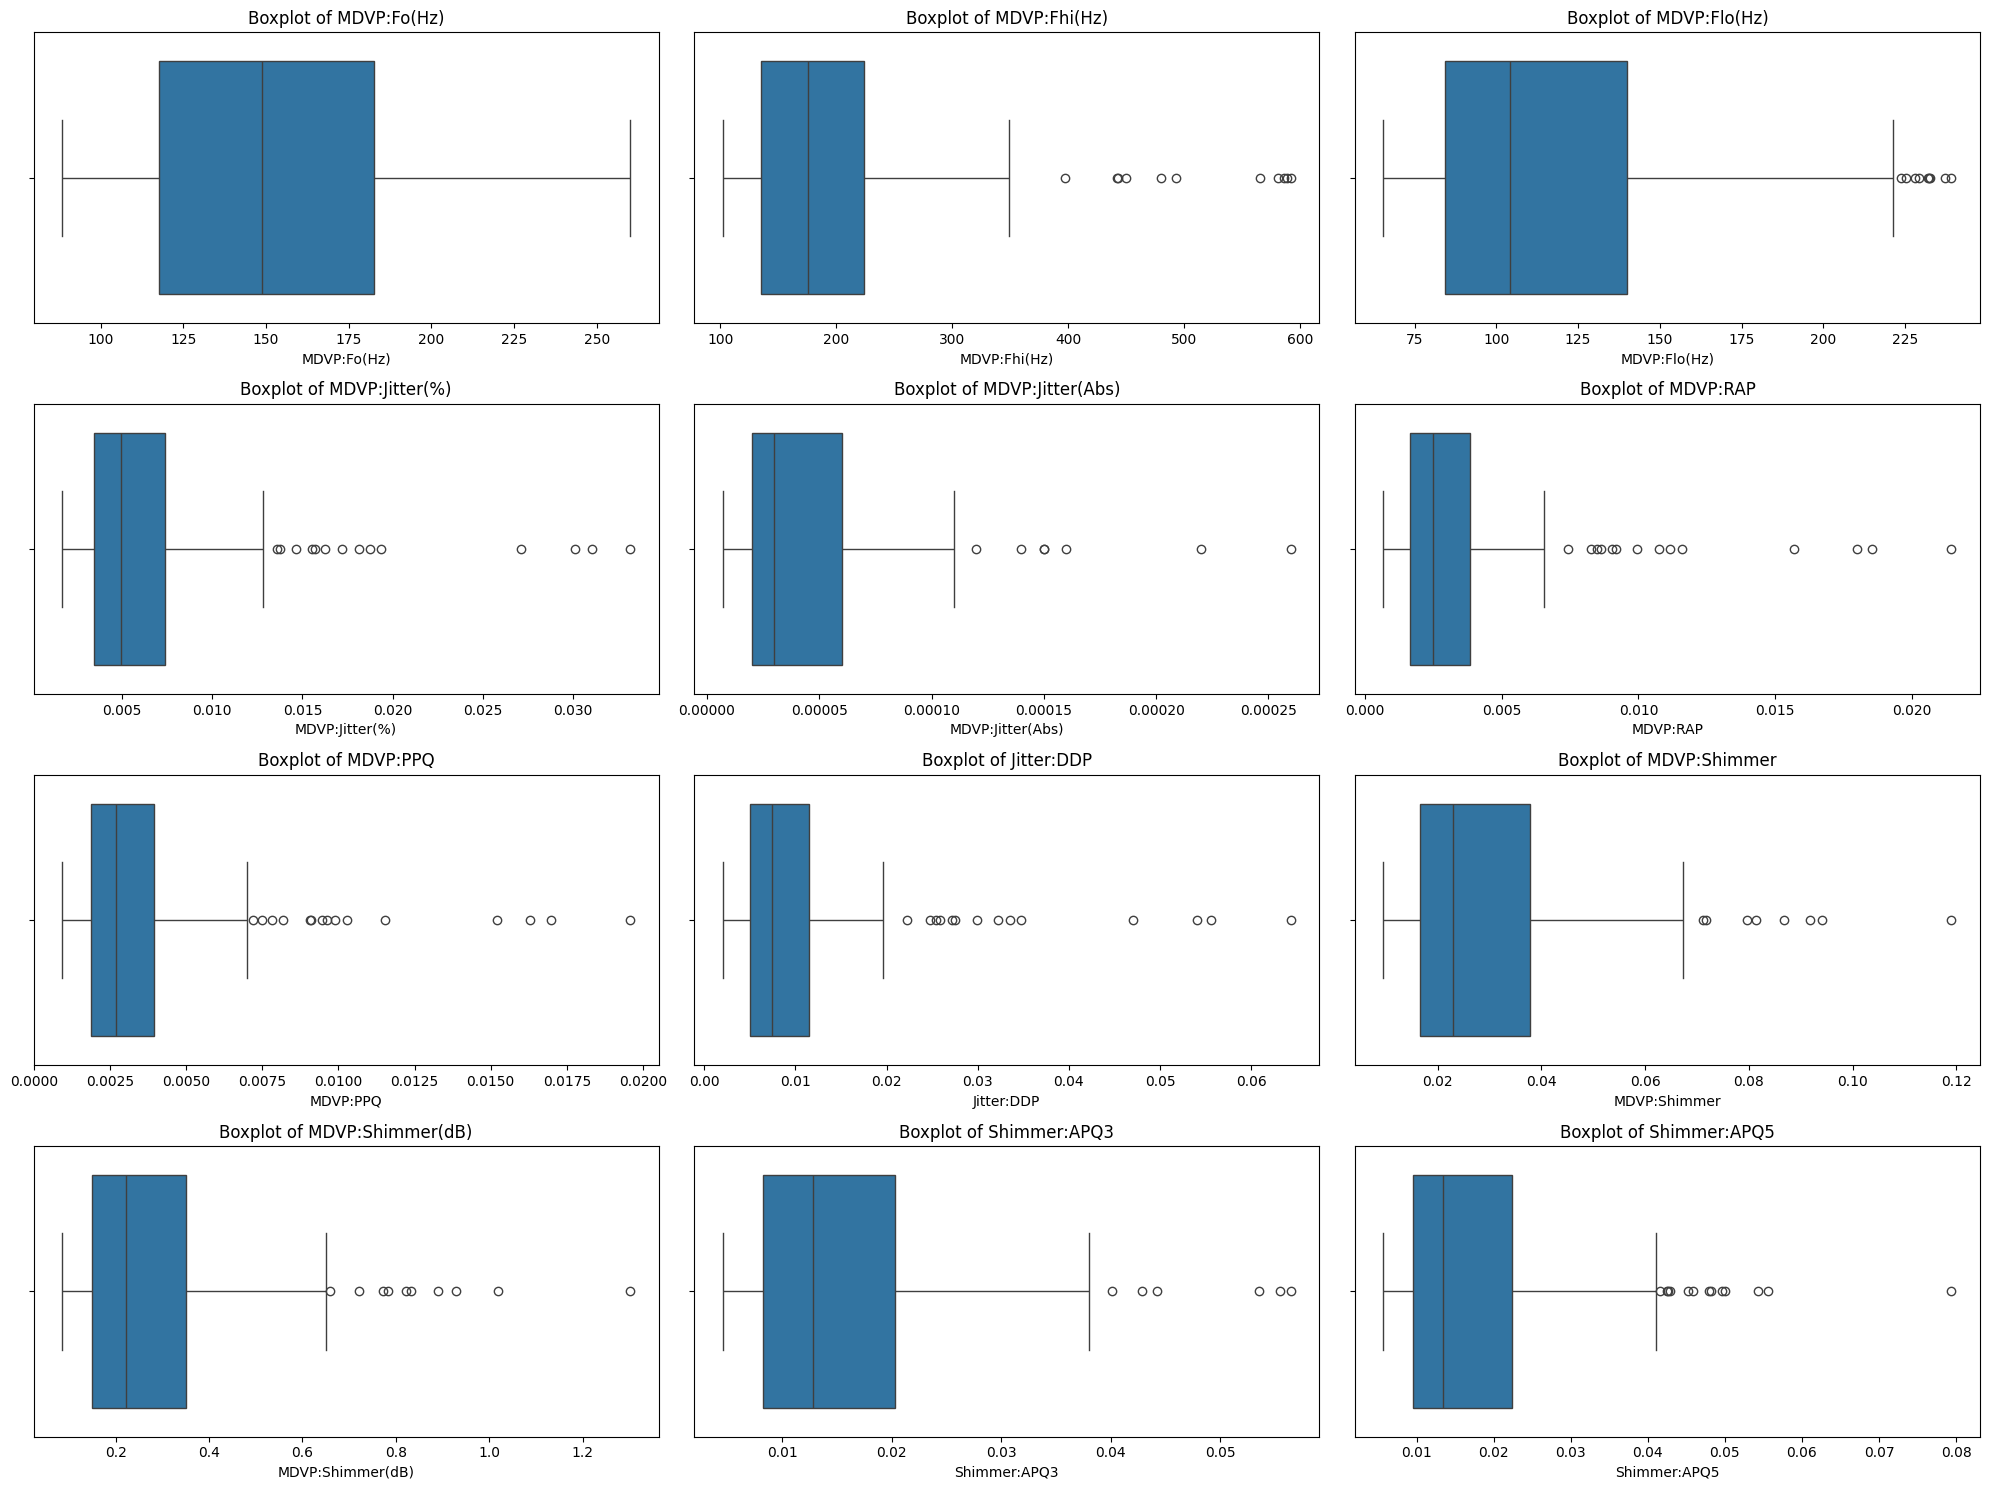

In [4]:
## שלב 4: Boxplots לאיתור Outliers
num_cols = df.drop(columns=['name', 'status']).columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols[:12]):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

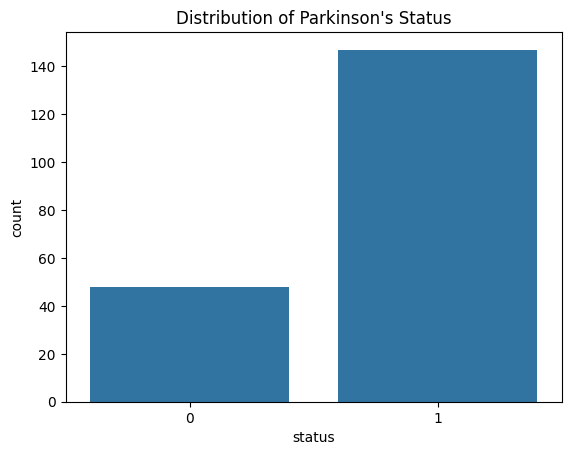

In [5]:
## שלב 5: התפלגות מחלה
sns.countplot(x='status', data=df)
plt.title("Distribution of Parkinson's Status")
plt.show()

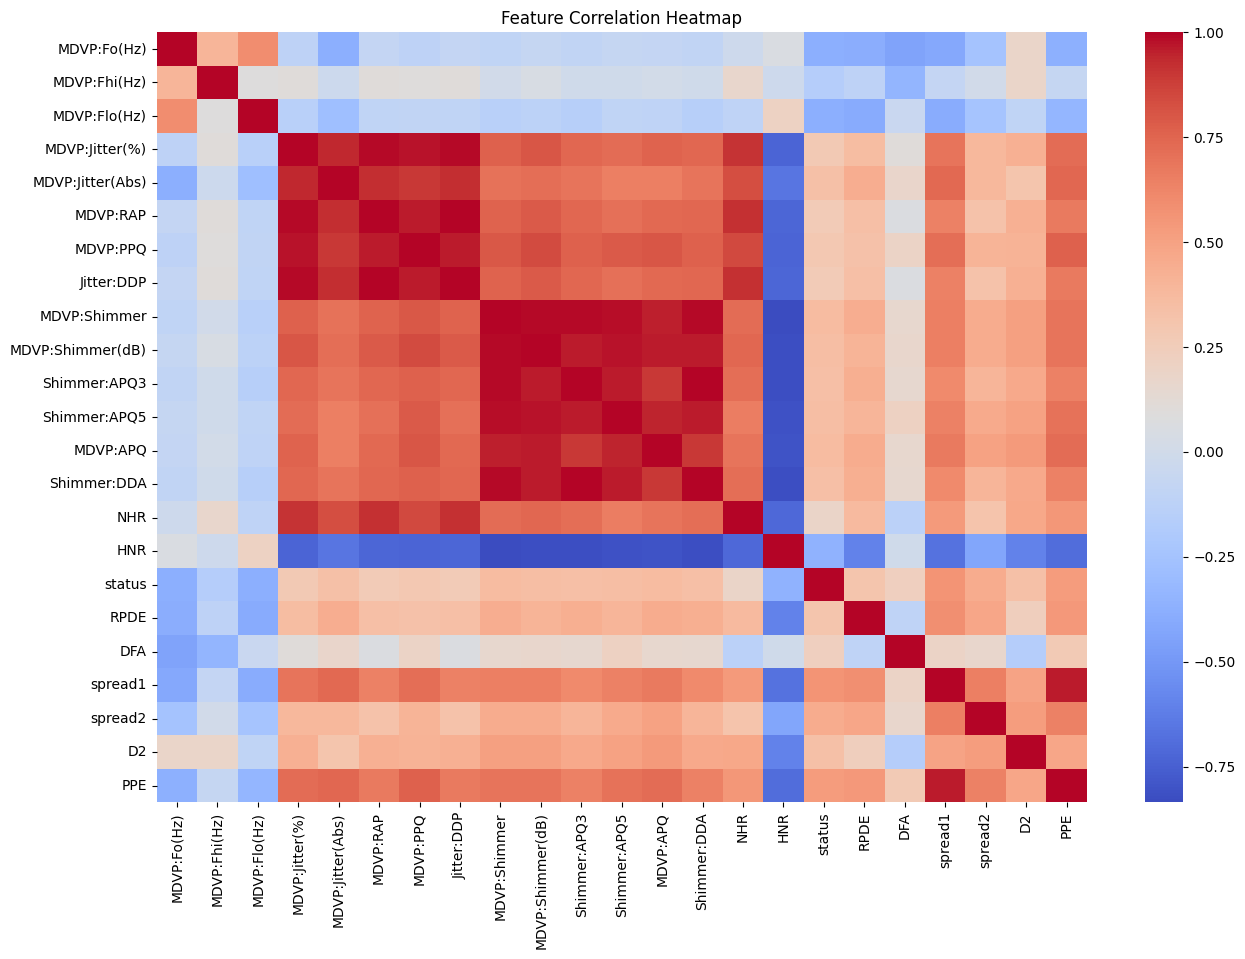

In [6]:
## שלב 6: קורלציות
plt.figure(figsize=(15,10))
sns.heatmap(df.drop(columns=['name']).corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

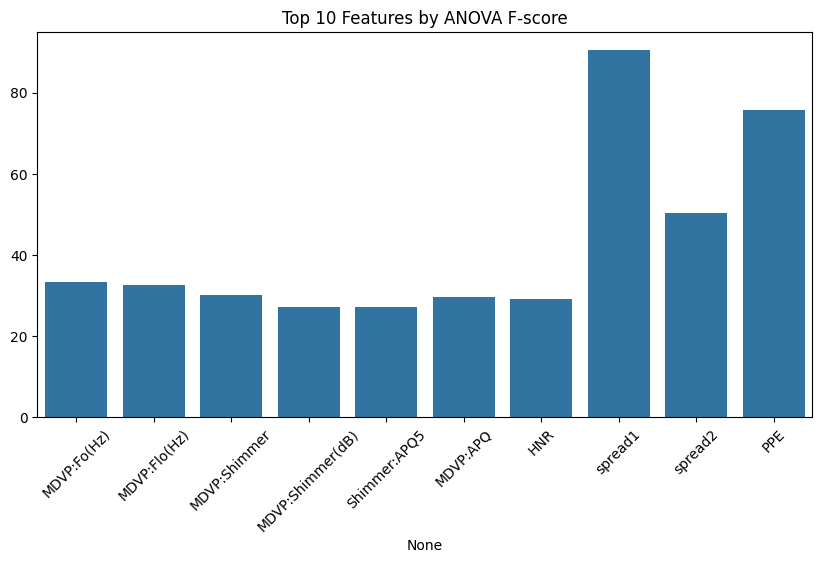

In [7]:
## שלב 7: SelectKBest
X_temp = df.drop(columns=['name', 'status'])
y_temp = df['status']
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X_temp, y_temp)
selected_cols = X_temp.columns[selector.get_support()]

plt.figure(figsize=(10,5))
sns.barplot(x=selected_cols, y=selector.scores_[selector.get_support()])
plt.title('Top 10 Features by ANOVA F-score')
plt.xticks(rotation=45)
plt.show()

In [8]:
## שלב 8: בניית דאטה לאימון
X = df.drop(columns=['name', 'status'])
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import joblib

# הגדרת מודלים עם גריד
models_and_params = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'clf__n_estimators': [50, 100],
            'clf__max_depth': [None, 10]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'clf__C': [0.01, 0.1, 1.0]
        }
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {
            'clf__C': [0.1, 1, 10],
            'clf__kernel': ['linear', 'rbf']
        }
    },
    'MLP': {
        'model': MLPClassifier(max_iter=1000, random_state=42),
        'params': {
            'clf__hidden_layer_sizes': [(100,), (100, 50)],
            'clf__alpha': [0.0001, 0.001]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'clf__n_estimators': [50, 100],
            'clf__learning_rate': [0.01, 0.1]
        }
    }
}

best_model = None
best_auc = 0
best_name = ""
results = []

for name, config in models_and_params.items():
    print(f"\n🔍 Running GridSearch for {name}...")

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', config['model'])
    ])

    grid = GridSearchCV(pipe, config['params'], cv=5, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)
    y_proba = grid.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print("✔️ Best Params:", grid.best_params_)
    print("✔️ Accuracy:", acc)
    print("✔️ ROC AUC:", auc)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    results.append({
        'Model': name,
        'BestParams': grid.best_params_,
        'Accuracy': acc,
        'AUC': auc
    })

    if auc > best_auc:
        best_auc = auc
        best_model = grid.best_estimator_
        best_name = name

# שמירת המודל הטוב ביותר
joblib.dump(best_model, "model.pkl")

# הצגת סיכום
import pandas as pd
results_df = pd.DataFrame(results)
print("\n📊 Summary of Model Comparison:")
print(results_df.sort_values(by='AUC', ascending=False))


Best Params: {'clf__max_depth': None, 'clf__n_estimators': 50}
Accuracy: 0.9487179487179487
ROC AUC: 0.9129464285714286
[[ 5  2]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



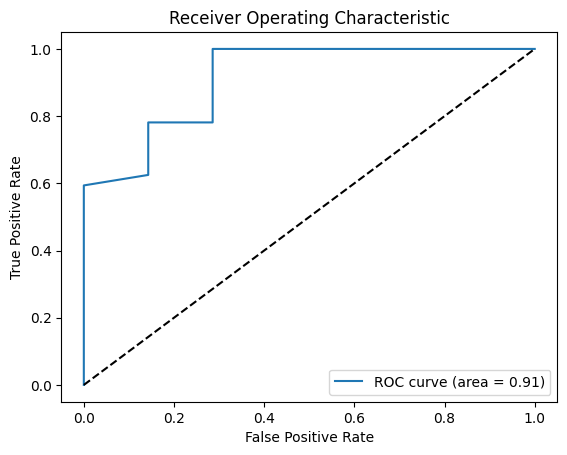

In [10]:
## שלב 10: עקומת ROC
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [11]:
## שלב 11: שמירת המודל
joblib.dump(best_model, 'model.pkl')
print("Model saved to model.pkl")

Model saved to model.pkl


In [22]:
# Save trained model to file
joblib.dump(best_model, 'model.pkl')
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

import joblib

# שמירת המודל המאומן עם שמות עמודות
joblib.dump(best_model, "model.pkl")
print("✅ המודל נשמר בהצלחה בשם model.pkl")
